In [ ]:
#from ensemble import RegressionEnsemble, MixedRegressionEnsemble, BootstrapEnsemble, ShuffleEnsemble
import ensemble
import importlib
importlib.reload(ensemble)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

import pandas as pd

# Repeating the results

In [20]:
boston = load_boston()
y = boston.target
X = boston.data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

num_experiments = 100
hist_params = {'bins':25,'grid':False,'sharey':True,'sharex':False}#,'ylim':(0,30)}#,'sharex':True}#,'ylabelsize':1}
#hist_params= {}#{'bins':25}

## Simple trees

In [21]:
results_list = []

for i in range(num_experiments):
    treeEnsemble = ensemble.RegressionEnsemble(10,DecisionTreeRegressor,seed = i+42)
    treeEnsemble.fit(X_train,y_train)
    results = treeEnsemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_tree_results = pd.DataFrame.from_records(results_list)

In [22]:
df_tree_results.head()

,correlation between error and variance,coverage probability,error normalcy,rsme
0,-0.029019,0.131737,244.215024,4.262507
1,-0.025103,0.131737,244.309858,4.271404
2,-0.016150,0.137725,243.869152,4.291311
3,-0.015190,0.125749,245.059659,4.279215
4,-0.017129,0.137725,245.650775,4.274653


In [23]:
df_tree_results.describe()

,correlation between error and variance,coverage probability,error normalcy,rsme
count,100.000000,100.000000,100.000000,100.000000
mean,-0.005667,0.123114,244.176372,4.301257
std,0.012656,0.010046,1.929781,0.028315
min,-0.035454,0.095808,239.790989,4.241548
25%,-0.015513,0.118263,242.759050,4.279030
50%,-0.003440,0.125749,244.502570,4.297514
75%,0.004464,0.131737,245.373501,4.325266
max,0.022294,0.143713,248.064378,4.364695


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e1562b0>,
      dtype=object)

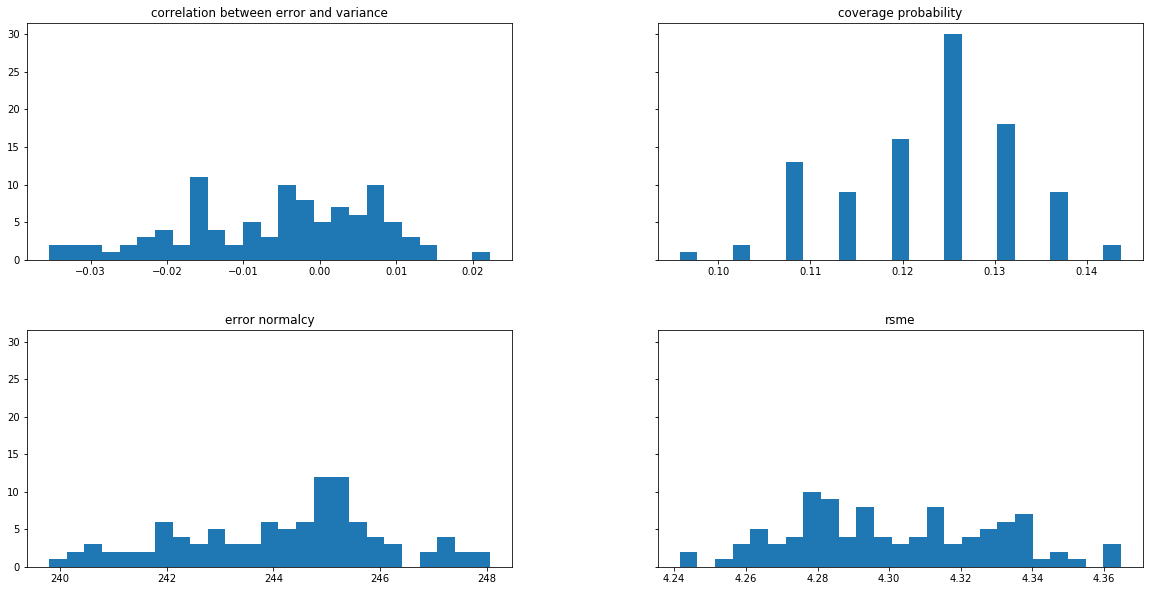

In [24]:
df_tree_results.hist(**hist_params)

## mixed Ensembles

In [25]:
results_list = []

for i in range(num_experiments):
    mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=1000),
                                                           SVR()])
    mixed_ensemble.fit(X_train,y_train)
    results = mixed_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_mixed_results = pd.DataFrame.from_records(results_list)

In [26]:
df_mixed_results.head()

,correlation between error and variance,coverage probability,error normalcy,rsme
0,0.615060,0.784431,67.092632,7.412437
1,0.584325,0.604790,166.457016,4.874204
2,0.661081,0.724551,73.936554,7.564254
3,0.706786,0.844311,50.441689,8.829435
4,0.422455,0.640719,175.861020,5.472721


In [27]:
df_mixed_results.describe()

,correlation between error and variance,coverage probability,error normalcy,rsme
count,100.000000,100.000000,100.000000,100.000000
mean,0.557819,0.730120,131.755518,6.811507
std,0.105775,0.106092,51.220366,1.650750
min,0.342335,0.532934,14.150427,4.538842
25%,0.486170,0.634731,80.238346,5.459057
50%,0.562146,0.715569,155.388436,6.499333
75%,0.614159,0.827844,169.877606,8.056561
max,0.870326,0.922156,216.952401,11.340634


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e5b0ba8>,
      dtype=object)

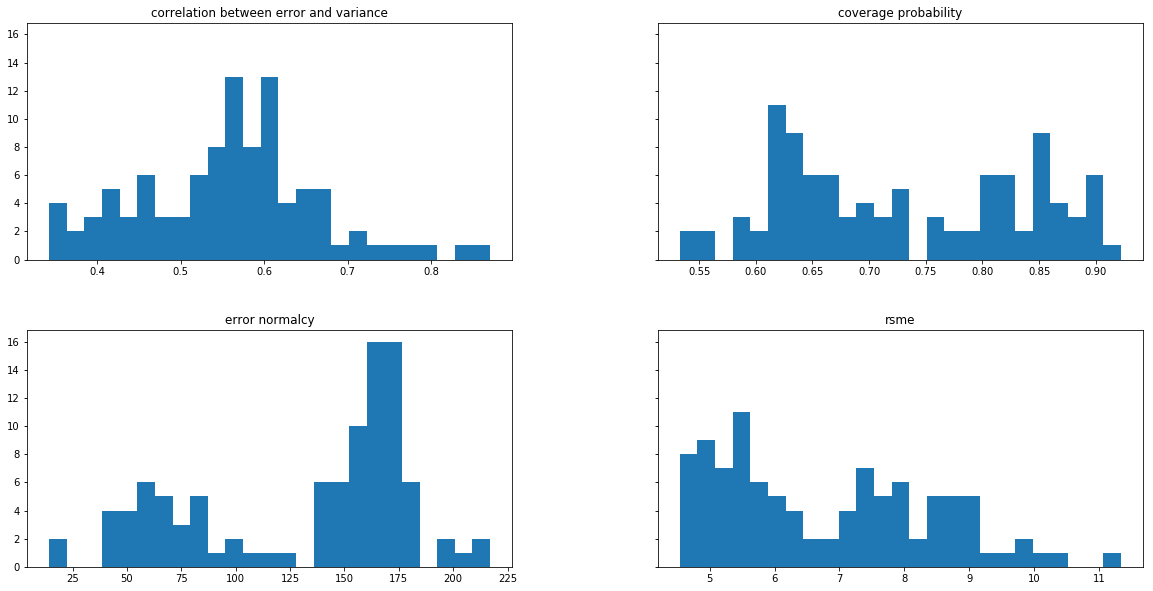

In [28]:
df_mixed_results.hist(**hist_params)

## Bootstrap

In [29]:
results_list = []

for i in range(num_experiments):
    bootstrap_ensemble = ensemble.BootstrapEnsemble()

    bootstrap_ensemble.fit(X_train,y_train)
    results = bootstrap_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_bootstrap_results = pd.DataFrame.from_records(results_list)

In [30]:
df_bootstrap_results.head()

,correlation between error and variance,coverage probability,error normalcy,rsme
0,0.370957,0.658683,321.648621,3.727518
1,0.359295,0.736527,312.501487,3.762579
2,0.380119,0.688623,320.943337,3.710710
3,0.389304,0.688623,319.146080,3.676241
4,0.398665,0.676647,313.284372,3.788989


In [31]:
df_bootstrap_results.describe()

,correlation between error and variance,coverage probability,error normalcy,rsme
count,100.000000,100.000000,100.000000,100.000000
mean,0.391080,0.696347,315.313693,3.746593
std,0.018719,0.020801,3.692304,0.042817
min,0.327582,0.646707,304.651204,3.664446
25%,0.379266,0.682635,312.826195,3.717516
50%,0.389450,0.694611,315.372021,3.738839
75%,0.403458,0.706587,317.790010,3.779677
max,0.433663,0.742515,323.901292,3.891531


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10eab4978>,
      dtype=object)

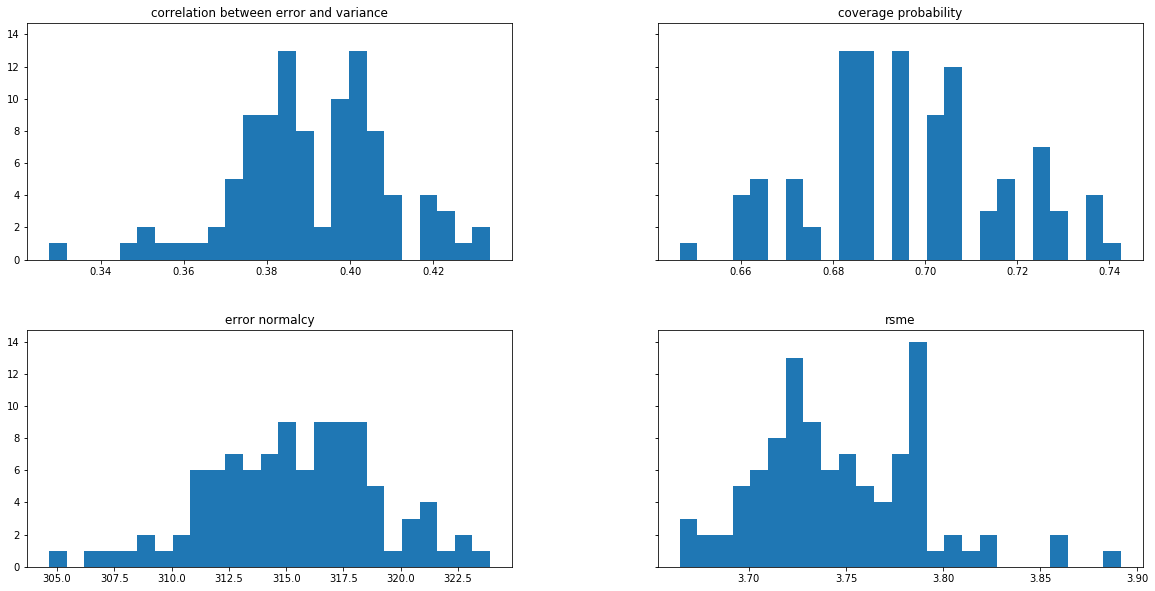

In [32]:
df_bootstrap_results.hist(**hist_params)

## Different Data Shuffling

In [33]:
results_list = []

for i in range(num_experiments):
    shuffle_ensemble = ensemble.ShuffleEnsemble()
    shuffle_ensemble.fit(X_train,y_train)
    results = shuffle_ensemble.self_evaluate(X_test,y_test)
    results_list.append(results)
    
df_shuffle_results = pd.DataFrame.from_records(results_list)

In [34]:
df_shuffle_results.head()

,correlation between error and variance,coverage probability,error normalcy,rsme
0,-0.031504,0.167665,249.474048,4.239538
1,-0.040539,0.161677,243.612311,4.308586
2,-0.052708,0.149701,243.948621,4.283286
3,-0.032843,0.155689,245.782743,4.281922
4,-0.027134,0.149701,243.377953,4.300101


In [35]:
df_shuffle_results.describe()

,correlation between error and variance,coverage probability,error normalcy,rsme
count,100.000000,100.000000,100.000000,100.000000
mean,-0.038925,0.151018,245.526925,4.280061
std,0.012156,0.010919,2.198169,0.033749
min,-0.072668,0.125749,238.182175,4.207380
25%,-0.045972,0.143713,243.930171,4.257634
50%,-0.037889,0.149701,245.627245,4.280791
75%,-0.030852,0.161677,246.984463,4.300194
max,-0.009569,0.179641,250.027615,4.392064


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f0d0278>,
      dtype=object)

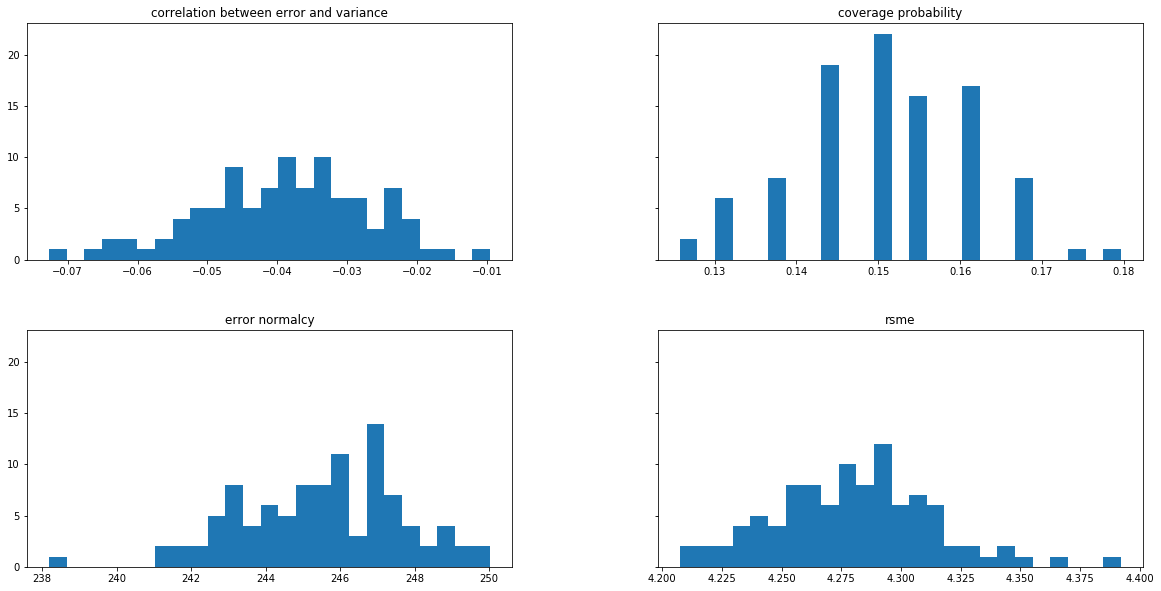

In [36]:
df_shuffle_results.hist(**hist_params)